In [37]:
from tensorflow import keras
from matplotlib import pyplot as plt

In [26]:
# Load model (returns encoder and decoder separately)
def load_autoencoder():
    model = keras.models.load_model('mnist_enc/mnist_enc')
    layer = model.get_layer('dense_2')
    bottom_input = keras.layers.Input(model.input_shape[1:])
    bottom_output = bottom_input
    top_input = keras.layers.Input(layer.output_shape[1:])
    top_output = top_input

    bottom = True
    for layer in model.layers:
        if bottom:
            bottom_output = layer(bottom_output)
        else:
            top_output = layer(top_output)
        if layer.name == 'dense_2':
            bottom = False

    enc_model = keras.Model(bottom_input, bottom_output)
    dec_model = keras.Model(top_input, top_output)
    return enc_model, dec_model

In [27]:
load_autoencoder()

(<keras.engine.functional.Functional at 0x206763fb370>,
 <keras.engine.functional.Functional at 0x2067516e730>)

In [28]:
# encodes MNIST data
def encode_mnist(encoder, data):
    return encoder.predict(data)

#decodes compressed data
def decode_mnist(decoder, data):
    return decoder.predict(data)

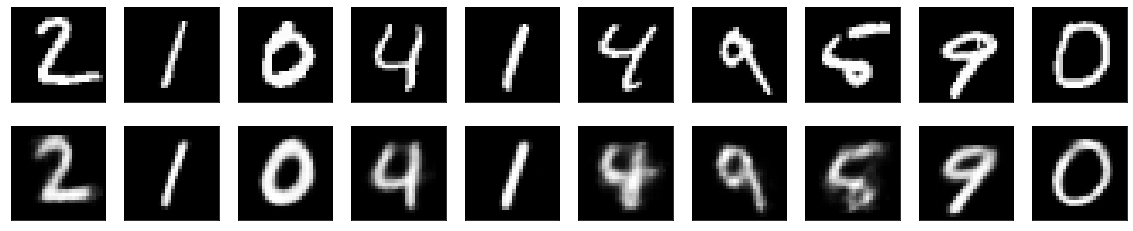

In [39]:
#Test
mnist_test = keras.datasets.mnist.load_data(path="mnist.npz")[1][0].reshape((-1, 784)) / 255
enc, dec = load_autoencoder()
encoded = encode_mnist(enc, mnist_test)
decoded = decode_mnist(dec, encoded)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(mnist_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()